# Exploratory Data Analysis

## Import data

In [1]:
import pandas as pd
from utils.load_data import load_train_val_set

X, Y = load_train_val_set(is_plot_data=True)

In [2]:
X.head()

,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,SNP_9,SNP_10,...,SNP_375,SNP_376,SNP_377,SNP_378,SNP_379,SNP_380,SNP_381,SNP_382,SNP_383,SNP_384
0,BB,BB,BB,AB,BB,AB,AB,AB,BB,BB,...,AB,NC,NC,AA,BB,AA,AB,AA,BB,AA
1,BB,BB,BB,AA,BB,AB,BB,AB,AB,BB,...,NC,NC,AB,BB,BB,AB,NC,BB,AA,AA
2,BB,BB,BB,BB,BB,AA,BB,AA,AA,AB,...,NC,NC,NC,AB,BB,AA,NC,AA,BB,AA
3,AB,BB,BB,AA,BB,AA,BB,AA,AB,AB,...,NC,NC,NC,AA,AB,AA,NC,AB,AB,AA
4,BB,BB,BB,AB,BB,AA,AB,AA,BB,AB,...,AB,NC,NC,AB,BB,AA,AB,BB,AA,AB


In [3]:
Y.head()

,outcome,treatment
0,5.298013,fenofibric_acid
1,-35.944700,fenofibric_acid
2,-23.837209,fenofibric_acid
3,-31.578947,fenofibric_acid
4,-20.833333,fenofibric_acid


### Relationship between outcome and treatment

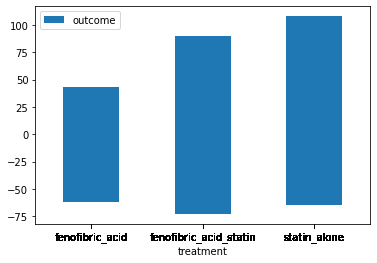

In [4]:
ax = Y.plot.bar(x='treatment', y='outcome', rot=0)

### Relationship between outcome per treatments

In [5]:
fenofibric_acid = Y[Y["treatment"] == 'fenofibric_acid']
fenofibric_acid_statin = Y[Y["treatment"] == 'fenofibric_acid_statin']
statin_alone = Y[Y["treatment"] == 'statin_alone']

<AxesSubplot:ylabel='Frequency'>

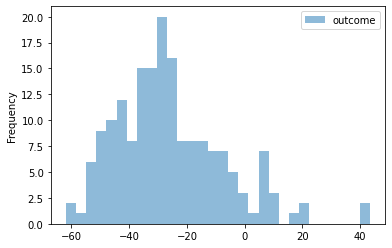

In [6]:
fenofibric_acid.plot.hist(bins=30, alpha=0.5)

<AxesSubplot:ylabel='Density'>

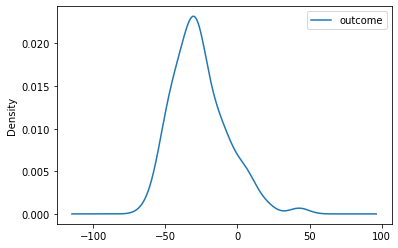

In [7]:
fenofibric_acid.plot.kde()

<AxesSubplot:ylabel='Frequency'>

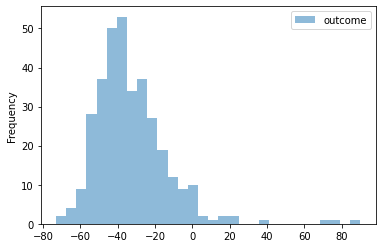

In [8]:
fenofibric_acid_statin.plot.hist(bins=30, alpha=0.5)

<AxesSubplot:ylabel='Density'>

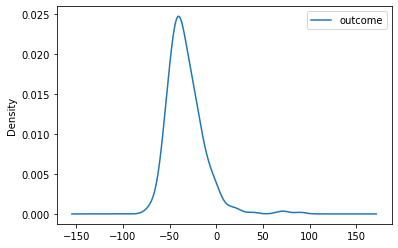

In [9]:
fenofibric_acid_statin.plot.kde()

<AxesSubplot:ylabel='Frequency'>

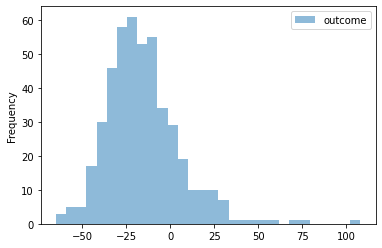

In [10]:
statin_alone.plot.hist(bins=30, alpha=0.5)

<AxesSubplot:ylabel='Density'>

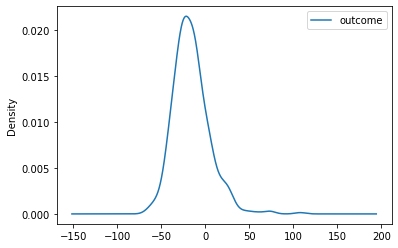

In [11]:
statin_alone.plot.kde()

### Calculate for features extraction

In [12]:
def count_elements(col):
    res = {'AA':0, 'AB':0, 'BB':0, 'NC':0}
    for e in col:
        res[e] += 1
    return res

def extract_noninfo_cols():
    for (columnName, columnData) in X.iteritems():
        res = count_elements(columnData.values)
        sum_value = sum(res.values())
        new_dict = {k : v/sum_value*100 for k, v in res.items()}
        if max(new_dict.values()) >= 95:
            # print('Colunm Name : ', columnName)
            yield columnName



In [13]:
tmp = list(extract_noninfo_cols())
print(tmp)

['SNP_5', 'SNP_55', 'SNP_64', 'SNP_115', 'SNP_119', 'SNP_139', 'SNP_141', 'SNP_146', 'SNP_188', 'SNP_223', 'SNP_225', 'SNP_231', 'SNP_232', 'SNP_244', 'SNP_275', 'SNP_283', 'SNP_300', 'SNP_314', 'SNP_316', 'SNP_327', 'SNP_361', 'SNP_371', 'SNP_376']


In [14]:
uncorrelate_col_candidates = X[tmp]
uncorrelate_col_candidates.tail()

,SNP_5,SNP_55,SNP_64,SNP_115,SNP_119,SNP_139,SNP_141,SNP_146,SNP_188,SNP_223,...,SNP_244,SNP_275,SNP_283,SNP_300,SNP_314,SNP_316,SNP_327,SNP_361,SNP_371,SNP_376
973,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,AA,BB,NC,AA,BB,BB,AA,NC,BB,NC
974,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,AA,BB,NC,AA,BB,BB,AA,NC,BB,NC
975,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,AA,BB,NC,AA,BB,BB,AA,NC,BB,NC
976,BB,AA,BB,BB,AB,BB,BB,NC,AB,AA,...,AA,BB,NC,AA,BB,BB,AA,NC,BB,NC
977,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,AA,BB,NC,AA,BB,BB,AA,NC,BB,NC


In [15]:
drop_cols = pd.concat([uncorrelate_col_candidates, Y[["outcome"]]], axis =1)
drop_cols.to_csv('./dataset/uncorrelate_col_candidates.csv', sep=',', index=False)
drop_cols.tail()

,SNP_5,SNP_55,SNP_64,SNP_115,SNP_119,SNP_139,SNP_141,SNP_146,SNP_188,SNP_223,...,SNP_275,SNP_283,SNP_300,SNP_314,SNP_316,SNP_327,SNP_361,SNP_371,SNP_376,outcome
973,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,BB,NC,AA,BB,BB,AA,NC,BB,NC,-18.840580
974,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,BB,NC,AA,BB,BB,AA,NC,BB,NC,2.777778
975,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,BB,NC,AA,BB,BB,AA,NC,BB,NC,-13.432836
976,BB,AA,BB,BB,AB,BB,BB,NC,AB,AA,...,BB,NC,AA,BB,BB,AA,NC,BB,NC,23.125000
977,BB,AA,BB,BB,AB,BB,BB,NC,AA,AA,...,BB,NC,AA,BB,BB,AA,NC,BB,NC,-12.558140


In [22]:
with open('./dataset/drop_col.txt', 'w') as f:
    for col in uncorrelate_col_candidates:
         f.write(col + '\n')
    f.close()

### Choose k in PCA

In [24]:
X_drop, Y_drop, _, _ = load_train_val_set(is_one_hot=True, is_drop_col=True)

In [31]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_drop)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'cumulative explained variance')

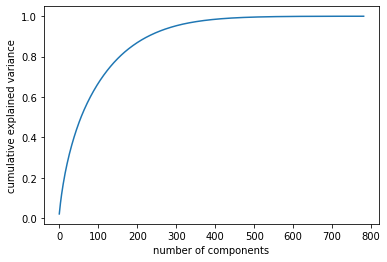

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

=> k = 280